# DATA INCUBATOR plot #1 

In this plot, the distinct correlations for the studied footprints (25m × 25m, 50m × 50m, 100m × 100m, 150m × 150m, 200m × 200m, 300m × 300m, 500m × 500m, 1000m × 1000m, 2000m × 2000m, 3000m × 3000m, 5000m × 5000m) for all studied contaminants and all studied urban parameters are shown.  From these plots, the influences of the distinct urban parameters on the local air quality and the extent of their area of influence can be derived. 

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import xlrd

DATA LOADING

In [47]:
xdirect = [25,50,100,150,200,300,500,1000,2000,3000,5000]
workbook = xlrd.open_workbook('plot1data.xlsx')
worksheet = workbook.sheet_by_index(0)

all_data = []
data = []
count = 0
for row in range(worksheet.nrows):
    label = worksheet.cell_value(row, 0)
    elm = []
    for col in range(1, worksheet.ncols):
        elm.append(worksheet.cell_value(row, col))
    data.append(elm)
    count = count + 1
    if count == 6:
        all_data.append(data)
        data = []
        count = 0


DATA PLOTTING

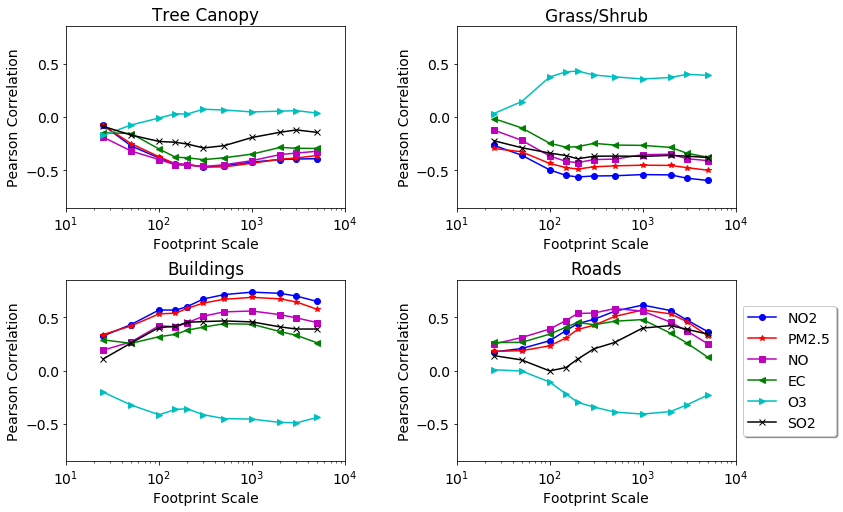

In [45]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.title.set_text('Tree Canopy')
ax2.title.set_text('Grass/Shrub')
ax3.title.set_text('Buildings')
ax4.title.set_text('Roads')
fig.subplots_adjust(hspace=0.4, wspace=0.4)

xAll = []
xAll.append(ax1)
xAll.append(ax2)
xAll.append(ax3)
xAll.append(ax4)
        
for pl in xAll:
    data = all_data[count]
    pl.plot(xdirect, data[0],'bo-',label='NO2')
    pl.plot(xdirect, data[1],'r*-',label='PM2.5')
    pl.plot(xdirect, data[2],'ms-',label='NO')
    pl.plot(xdirect, data[3],'g<-',label='EC')
    pl.plot(xdirect, data[4],'c>-',label='O3')
    pl.plot(xdirect, data[5],'kx-',label='SO2')
    pl.axis([10,10000,-0.85,0.85])
    pl.set_ylabel('Pearson Correlation')
    pl.set_xlabel('Footprint Scale')

    pl.set_xscale('log')
    count = count + 1

axes = plt.gca()
box = axes.get_position()
axes.set_position([box.x0, box.y0, box.width, box.height])
legend = axes.legend(loc='center left', shadow=True, bbox_to_anchor=(1, 0.5))
plt.rcParams.update({'font.size': 14})
plt.show()